In [3]:
import numpy as np
import pandas as pd

In [6]:
import os
from PIL import Image

ROOT = os.getcwd()
WORK_DIR = os.path.dirname(ROOT)

### ***Compute distance***

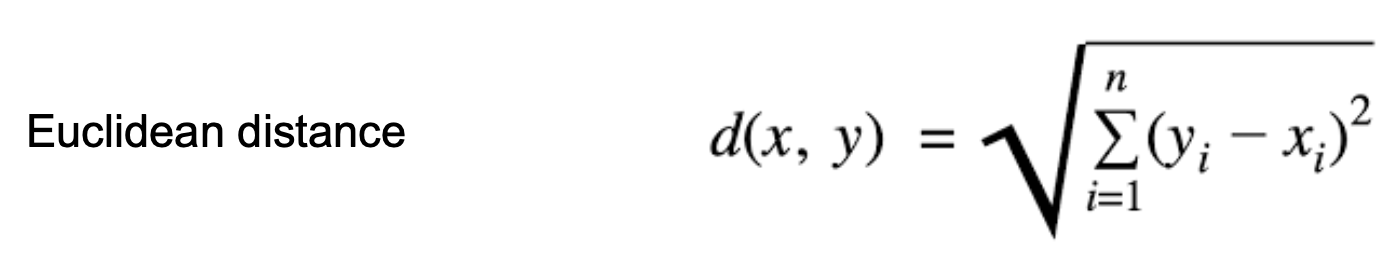

In [2]:
Image.open(os.path.join(WORK_DIR, 'images/Euclidean.png'))

In [4]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((y-x)**2))

### ***Setup KNN***

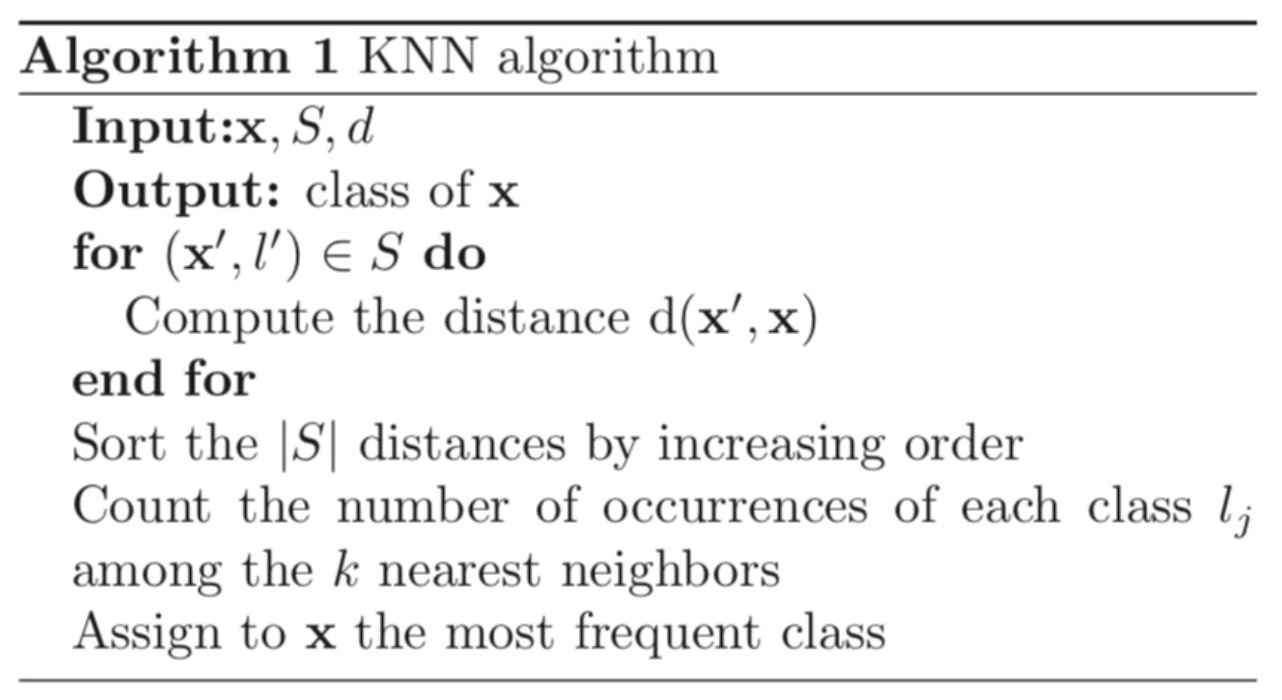

In [7]:
Image.open(os.path.join(WORK_DIR, 'images/knn.png'))

In [86]:
from collections import Counter

class KNN:
    '''
    Establish KNN algorithm
    '''
    def __init__(self, k) -> None:
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        prediction = [self._predict(x) for x in X_test]
        
        return prediction
    
    def _predict(self, X_test):
        # Compute the distance
        distance = [euclidean_distance(X_test, X_train) for X_train in self.X_train]
        
        # Get the closest k
        k_indices = np.argsort(distance)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Votes
        most_common = Counter(k_nearest_labels).most_common()
        

        return most_common[0][0]

In [10]:
from sklearn import datasets

data = datasets.load_iris()


In [19]:
target = pd.DataFrame({'Label': data.target.tolist()}, index=range(len(data.target.tolist())))
target.replace({0: 'Iris-Setosa', 1: 'Iris-Versicolour', 2: 'Iris-Virginica'}, inplace=True)

In [40]:
features = pd.DataFrame({'sepal_length': data.data[:,0].tolist(), 'sepal_width': data.data[:,1].tolist(),
                         'petal_length': data.data[:,2].tolist(), 'petal_width': data.data[:,-1].tolist()}, index=range(len(data.data[:, 0].tolist())))

df = pd.concat([features, target], axis=1)

In [44]:
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,3.6,1.4,0.2,Iris-Setosa
5,5.4,3.9,1.7,0.4,Iris-Setosa
6,4.6,3.4,1.4,0.3,Iris-Setosa
7,5.0,3.4,1.5,0.2,Iris-Setosa
8,4.4,2.9,1.4,0.2,Iris-Setosa
9,4.9,3.1,1.5,0.1,Iris-Setosa


In [50]:
from sklearn.model_selection import train_test_split

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y= df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
78,6.0,2.9,4.5,1.5
2,4.7,3.2,1.3,0.2
101,5.8,2.7,5.1,1.9
33,5.5,4.2,1.4,0.2
59,5.2,2.7,3.9,1.4
106,4.9,2.5,4.5,1.7
50,7.0,3.2,4.7,1.4
125,7.2,3.2,6.0,1.8
52,6.9,3.1,4.9,1.5
48,5.3,3.7,1.5,0.2


### ***Fixed the label: Not effective (Do not use)***

In [ ]:
# Hyperparameter
K = 10


# Compute the distance
distances = [euclidean_distance(X_test.to_numpy(), X_sub_train) for X_sub_train in X_train.to_numpy()]
distances

In [68]:
# Get the closest k
k_indices = np.argsort(distances)[:K]
k_nearest_labels = [y_train.values.tolist()[i] for i in k_indices.tolist()]
k_nearest_labels

['Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Versicolour']

In [70]:
from collections import Counter

most_common = Counter(k_nearest_labels).most_common()
most_common[0][0]

'Iris-Versicolour'

In [77]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test.to_numpy(), [most_common[0][0]] * y_test.to_numpy().shape[0])

In [78]:
acc

0.36666666666666664

In [79]:
acc = np.sum(most_common[0][0] == y_test.to_numpy()) / y_test.to_numpy().shape[0]

In [80]:
acc

0.36666666666666664

In [81]:
df_prediction = pd.concat([X_test, y_test],axis=1)
df_prediction['prediction'] = [most_common[0][0]] * df_prediction.shape[0]
df_prediction

,sepal_length,sepal_width,petal_length,petal_width,Label,prediction
78,6.0,2.9,4.5,1.5,Iris-Versicolour,Iris-Versicolour
2,4.7,3.2,1.3,0.2,Iris-Setosa,Iris-Versicolour
101,5.8,2.7,5.1,1.9,Iris-Virginica,Iris-Versicolour
33,5.5,4.2,1.4,0.2,Iris-Setosa,Iris-Versicolour
59,5.2,2.7,3.9,1.4,Iris-Versicolour,Iris-Versicolour
106,4.9,2.5,4.5,1.7,Iris-Virginica,Iris-Versicolour
50,7.0,3.2,4.7,1.4,Iris-Versicolour,Iris-Versicolour
125,7.2,3.2,6.0,1.8,Iris-Virginica,Iris-Versicolour
52,6.9,3.1,4.9,1.5,Iris-Versicolour,Iris-Versicolour
48,5.3,3.7,1.5,0.2,Iris-Setosa,Iris-Versicolour


### ***Flexible method***

In [91]:
# Hyperparameter
K = 10

In [98]:
def _predict(X_train, X_test):
    
    # Compute the distance
    distances = [euclidean_distance(X_test, X_sub_train) for X_sub_train in X_train]
    
    # Get the closest k
    k_indices = np.argsort(distances)[:K]
    k_nearest_labels = [y_train.values.tolist()[i] for i in k_indices.tolist()]
    most_common = Counter(k_nearest_labels).most_common()
    
    return most_common[0][0]
    
def predict(X_test):
    
    prediction = [_predict(X_train.to_numpy(), x) for x in X_test]
    return prediction

In [99]:
prediction_func = predict(X_test.to_numpy())

In [101]:
prediction_func_results = pd.concat([X_test, y_test], axis=1)
prediction_func_results['prediction'] = prediction_func
prediction_func_results

,sepal_length,sepal_width,petal_length,petal_width,Label,prediction
78,6.0,2.9,4.5,1.5,Iris-Versicolour,Iris-Versicolour
2,4.7,3.2,1.3,0.2,Iris-Setosa,Iris-Setosa
101,5.8,2.7,5.1,1.9,Iris-Virginica,Iris-Virginica
33,5.5,4.2,1.4,0.2,Iris-Setosa,Iris-Setosa
59,5.2,2.7,3.9,1.4,Iris-Versicolour,Iris-Versicolour
106,4.9,2.5,4.5,1.7,Iris-Virginica,Iris-Versicolour
50,7.0,3.2,4.7,1.4,Iris-Versicolour,Iris-Versicolour
125,7.2,3.2,6.0,1.8,Iris-Virginica,Iris-Virginica
52,6.9,3.1,4.9,1.5,Iris-Versicolour,Iris-Versicolour
48,5.3,3.7,1.5,0.2,Iris-Setosa,Iris-Setosa


In [103]:
clf = KNN(k=10)

clf.fit(X_train.to_numpy(), y_train.to_numpy())

prediction_cls = clf.predict(X_test.to_numpy())

print(prediction_cls)

['Iris-Versicolour', 'Iris-Setosa', 'Iris-Virginica', 'Iris-Setosa', 'Iris-Versicolour', 'Iris-Versicolour', 'Iris-Versicolour', 'Iris-Virginica', 'Iris-Versicolour', 'Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Versicolour', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Versicolour', 'Iris-Setosa', 'Iris-Versicolour', 'Iris-Setosa', 'Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Virginica', 'Iris-Setosa']


In [104]:
prediction_cls_results = pd.concat([X_test, y_test], axis=1)
prediction_cls_results['prediction'] = prediction_cls
prediction_cls_results

,sepal_length,sepal_width,petal_length,petal_width,Label,prediction
78,6.0,2.9,4.5,1.5,Iris-Versicolour,Iris-Versicolour
2,4.7,3.2,1.3,0.2,Iris-Setosa,Iris-Setosa
101,5.8,2.7,5.1,1.9,Iris-Virginica,Iris-Virginica
33,5.5,4.2,1.4,0.2,Iris-Setosa,Iris-Setosa
59,5.2,2.7,3.9,1.4,Iris-Versicolour,Iris-Versicolour
106,4.9,2.5,4.5,1.7,Iris-Virginica,Iris-Versicolour
50,7.0,3.2,4.7,1.4,Iris-Versicolour,Iris-Versicolour
125,7.2,3.2,6.0,1.8,Iris-Virginica,Iris-Virginica
52,6.9,3.1,4.9,1.5,Iris-Versicolour,Iris-Versicolour
48,5.3,3.7,1.5,0.2,Iris-Setosa,Iris-Setosa


In [106]:
acc = accuracy_score(y_test.to_numpy(), prediction_cls)

In [122]:
print('Accuracy:', acc*100, '%')

Accuracy: 90.0 %


In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

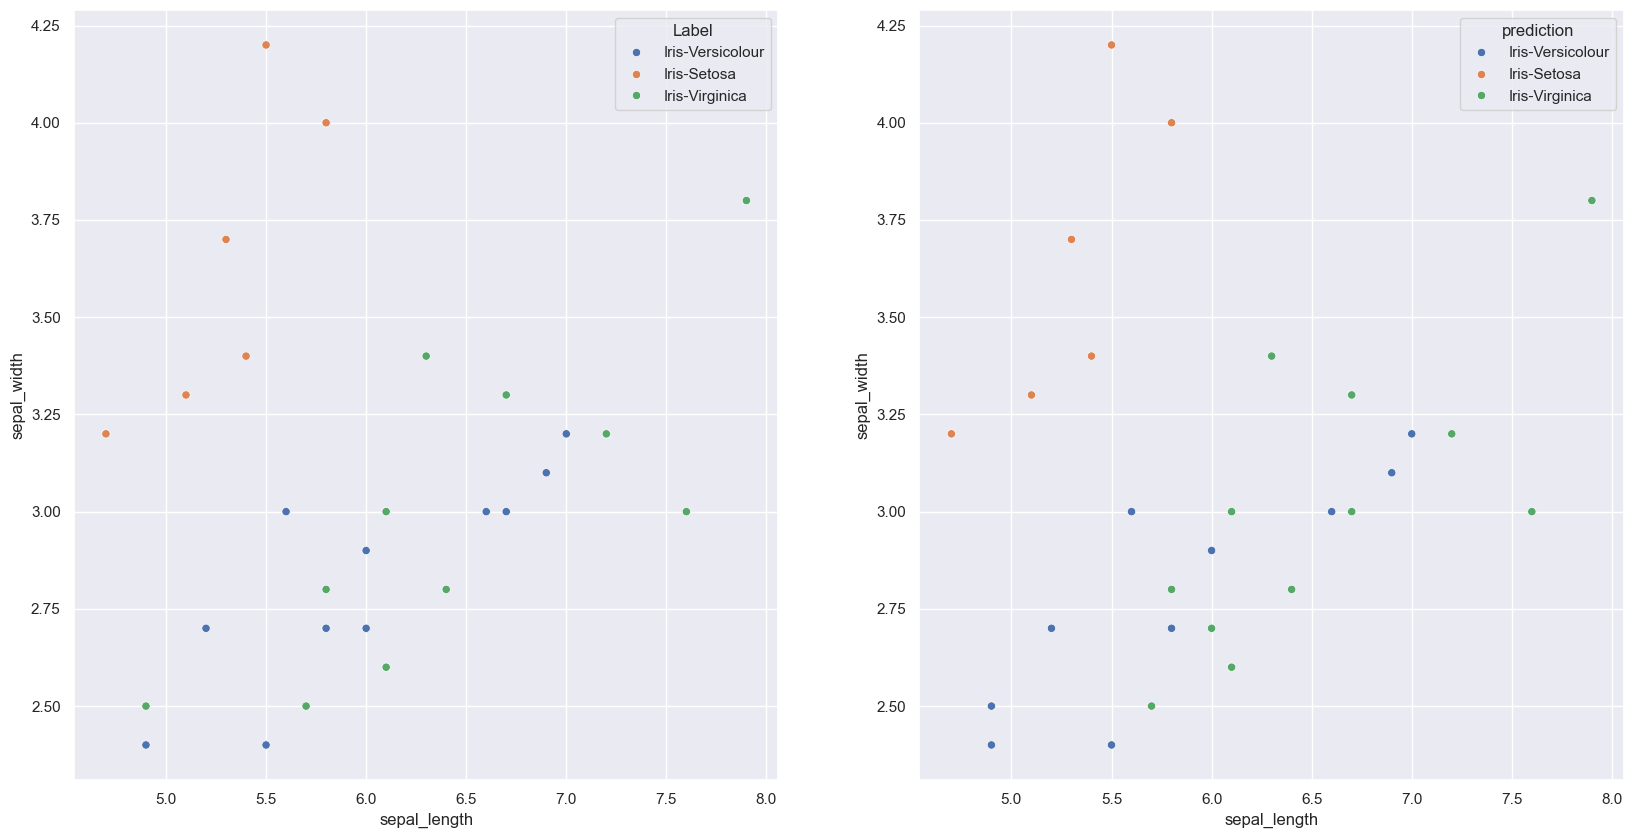

In [118]:
f, axes = plt.subplots(1, 2)
sns.set(rc={'figure.figsize':(20, 10)})
sns.scatterplot(data=prediction_cls_results, x="sepal_length", y="sepal_width", hue="Label", ax=axes[0])
sns.scatterplot(data=prediction_cls_results, x="sepal_length", y="sepal_width", hue="prediction", ax=axes[1])

<Axes: xlabel='petal_length', ylabel='petal_width'>

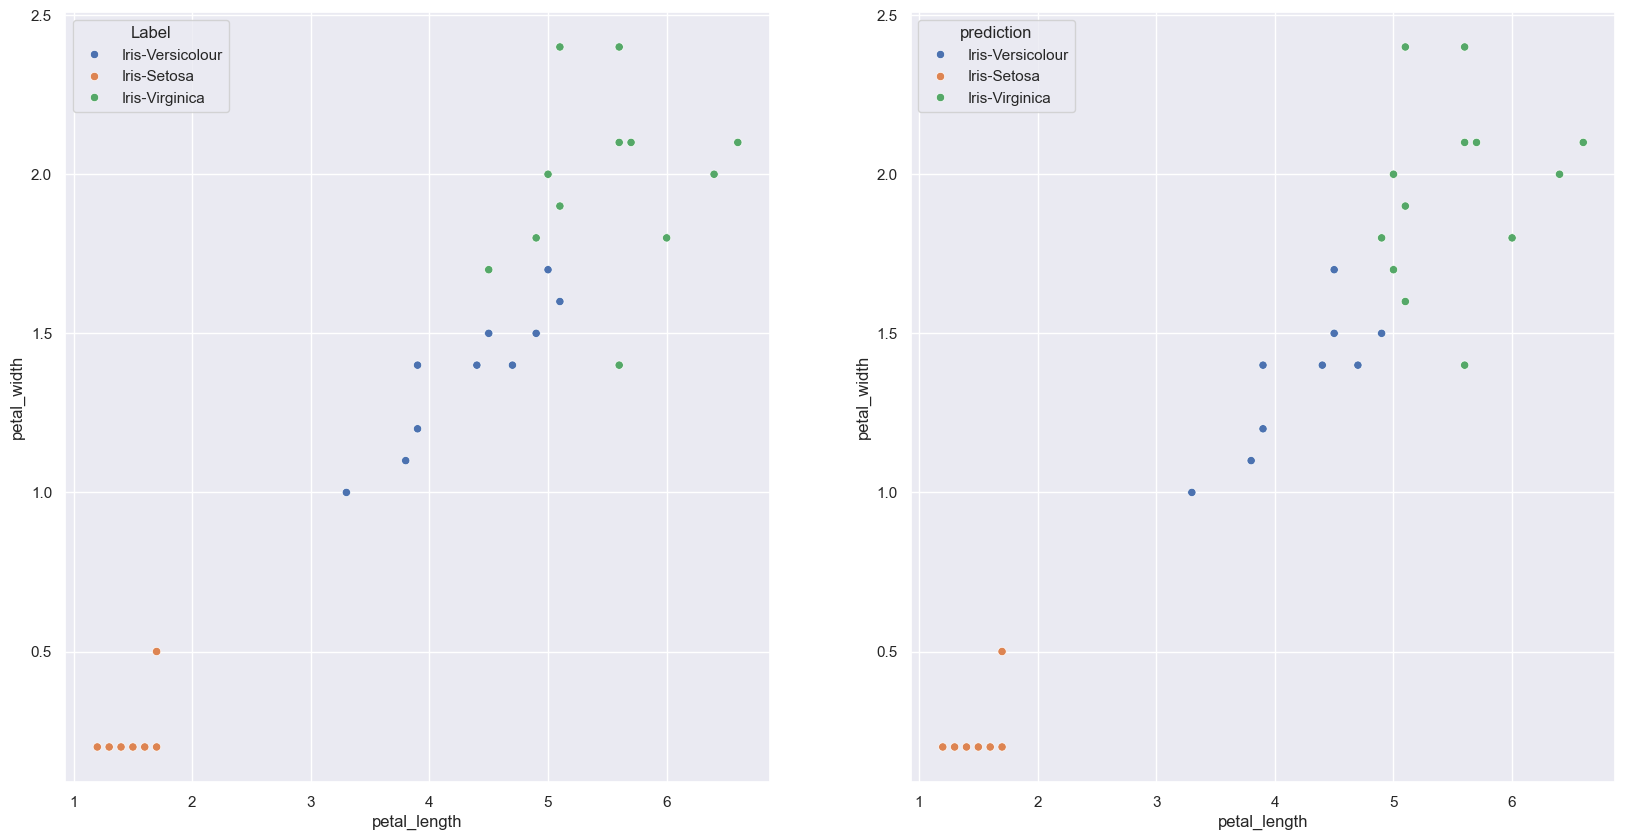

In [119]:
f, axes = plt.subplots(1, 2)
sns.set(rc={'figure.figsize':(20, 10)})
sns.scatterplot(data=prediction_cls_results, x="petal_length", y="petal_width", hue="Label", ax=axes[0])
sns.scatterplot(data=prediction_cls_results, x="petal_length", y="petal_width", hue="prediction", ax=axes[1])